<a href="https://colab.research.google.com/github/hncpyj/DataAnalytics/blob/main/FactorAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# pip install factor_analyzer

     |████████████████████████████████| 41 kB 429 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=84ceaa76a59de88fe88ffed43cb726d958157cf6b423954387f4ac30745e4452
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
# Py 3.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 읽기
med = pd.read_csv("/content/drive/MyDrive/DataAnalytics/MultivariateAnalysis/mva/medFactor.csv")
med.head(3)

# 연속인 변수의 기술통계량 구하기
med.describe()

# Py 3.2

# 인자분석 적정성 검정 (추가)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(med)
chi_square_value, p_value
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(med)
kmo_model

# 초기 인자분석
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
# help(FactorAnalyzer): 클래스 코드 보기
fa.fit(med)
# 고윳값 구하기
ev, v = fa.get_eigenvalues()
ev

# 스크리 그림 그리기
plt.scatter(range(1, med.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

# Py 3.3
# 인자 수를 3으로 한 인자분석 – 인자회전 Varimax
fa_varimax = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal')
fa_varimax.fit(med)
# 인자적재계수
fa_varimax.loadings_

# 인자 공통성(communality)
fa_varimax.get_communalities()

# 인자고유분산: 1-공통성
fa_varimax.get_uniquenesses()

# 인자분산
fa_varimax.get_factor_variance()

# Py 3.4
# Oblimin 인자회전
fa_obm = FactorAnalyzer(n_factors=3, rotation='oblimin', method='principal')
fa_obm.fit(med)
# 인자적재계수
fa_obm.loadings_

# 인자 공통성(communality)
fa_obm.get_communalities()

# 인자고유분산: 1-공통성
fa_obm.get_uniquenesses()

# 인자분산
fa_obm.get_factor_variance()



In [ ]:
# Py 3.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 읽기
med = pd.read_csv("/content/drive/MyDrive/DataAnalytics/MultivariateAnalysis/mva/medFactor.csv")
med.head(3)

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
0,20,16,52,10,24,23,19,20,23,29,67
1,24,16,52,7,27,16,16,15,31,33,59
2,19,21,57,18,22,23,16,19,42,40,61


In [ ]:
# 기술통계량 구하기
med.describe()

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,19.960938,18.820312,54.695312,12.867188,25.640625,23.179688,16.171875,15.867188,38.812500,33.539062,66.906250
std,4.464034,4.088458,7.428990,2.986508,3.805786,4.159106,2.478599,2.651314,7.798395,4.097055,12.565067
min,4.000000,9.000000,26.000000,3.000000,16.000000,11.000000,4.000000,7.000000,16.000000,17.000000,9.000000
25%,17.000000,16.000000,50.750000,11.000000,23.000000,22.000000,15.000000,14.000000,34.000000,32.000000,59.000000
50%,20.000000,19.000000,55.000000,13.000000,26.000000,23.000000,17.000000,16.000000,40.000000,34.000000,67.000000
75%,23.000000,22.000000,60.250000,15.000000,29.000000,25.000000,18.000000,18.000000,45.000000,36.000000,76.000000
max,29.000000,28.000000,69.000000,19.000000,32.000000,56.000000,20.000000,20.000000,51.000000,41.000000,93.000000


In [11]:
# Py 3.2

# 인자분석 적정성 검정 (추가)
# 두 개의 값을 튜플로 보내고 출력
# Bartlett's test of sphericity
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(med)
chi_square_value, p_value

(341.20898764752224, 6.436275834348501e-43)

In [12]:
# KMO(Kaiser-Meyer-Olkin)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(med)
kmo_model

0.6840306201730827

In [18]:
# 초기 인자분석
# 회전하기 전의 값을 확인
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
# help(FactorAnalyzer): 클래스 코드 보기
fa.fit(med)
# 고유값 구하기
ev, v = fa.get_eigenvalues()
ev

array([3.37918137, 1.48277065, 1.25063015, 0.98047706, 0.7688022 ,
       0.73305114, 0.64039936, 0.62219335, 0.52837181, 0.35193006,
       0.26219284])

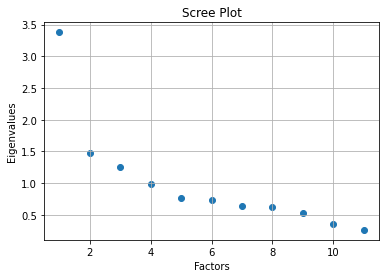

In [19]:
# 스크리 그림 그리기
plt.scatter(range(1, med.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

In [22]:
# Py 3.3
# 인자 수를 3으로 한 인자분석 – 인자회전 Varimax
# method를 따로 기재해주지 않으면 default로 minres로 설정된다.
fa_varimax = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal')
fa_varimax.fit(med)
# 인자적재계수
fa_varimax.loadings_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


array([[ 0.65878525,  0.12346342,  0.15968869],
       [ 0.11050158, -0.08558685,  0.78515374],
       [ 0.78277104,  0.12660215,  0.17034463],
       [ 0.18511311,  0.28536587,  0.76291477],
       [ 0.7311586 ,  0.22984416, -0.13511459],
       [ 0.64562431, -0.10713445,  0.18511691],
       [ 0.48611689,  0.48034384,  0.1024609 ],
       [ 0.01622228,  0.61957128,  0.28933538],
       [ 0.17951235,  0.65188733,  0.336389  ],
       [ 0.26415003,  0.69935448, -0.04008537],
       [-0.06632364,  0.64885446, -0.27650532]])

In [23]:
# 인자적재계수(round 3)
np.round(fa_varimax.loadings_, 3)

array([[ 0.659,  0.123,  0.16 ],
       [ 0.111, -0.086,  0.785],
       [ 0.783,  0.127,  0.17 ],
       [ 0.185,  0.285,  0.763],
       [ 0.731,  0.23 , -0.135],
       [ 0.646, -0.107,  0.185],
       [ 0.486,  0.48 ,  0.102],
       [ 0.016,  0.62 ,  0.289],
       [ 0.18 ,  0.652,  0.336],
       [ 0.264,  0.699, -0.04 ],
       [-0.066,  0.649, -0.277]])

In [30]:
# 인자 공통성(communality)
np.round(fa_varimax.get_communalities(), 3)

array([0.475, 0.636, 0.658, 0.698, 0.606, 0.463, 0.478, 0.468, 0.57 ,
       0.56 , 0.502])

In [31]:
# 인자고유분산: 1-공통성
np.round(fa_varimax.get_uniquenesses(), 3)

array([0.525, 0.364, 0.342, 0.302, 0.394, 0.537, 0.522, 0.532, 0.43 ,
       0.44 , 0.498])

In [32]:
# 인자분산
np.round(fa_varimax.get_factor_variance(), 3)

array([[2.388, 2.134, 1.591],
       [0.217, 0.194, 0.145],
       [0.217, 0.411, 0.556]])